In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
import cmocean as cm

from xgcm import Grid

# overflow case in z coords

trying MWIPG with minthickness 1e-12

In [39]:
basee = 'z/archive'
def open_files(label):
    base = basee 
    prog = xr.open_dataset(base + '/'+label+'.nc')
    return prog
def open_IC(label):
    base = basee 
    IC = xr.open_dataset(base + '/MOM_IC-'+label+'.nc')
    return IC
def open_visc(label):
    base = basee 
    IC = xr.open_dataset(base + '/visc-'+label+'.nc')
    return IC
def open_mom(label):
    base = basee 
    IC = xr.open_dataset(base + '/mom-'+label+'.nc')
    return IC

def plot(ax,yy0,tt,i,variable,varname,vmin1,vmax1,cmap,ymax):
    prog = open_files(label)
    ocean_static = xr.open_dataset('z/ocean_geometry.nc')
    grid = Grid(prog,coords={"x":{"center":"xh","outer":"xq"},
                             "y":{"center":"yh","outer":"yq"},
                             "z":{"center":"zl","outer":"zi"}},periodic=False)
    file_name = label
    #IC = open_IC(label)
    depth = grid.interp(prog.e,"x")
    lon = ocean_static.geolonb
    dataplot = variable

    xx = lon
    if (varname == "uo") or (varname == "PFu") or (varname == "visc_rem_u"): 
        dataplot = grid.interp(dataplot,"x")
    levels = np.linspace(vmin1, vmax1, 51)
    yy = depth[:,:,yy0,:]
    z_levels = yy.shape[1]
    yi = np.linspace(0,5000,z_levels) 
    xi, yyi = np.meshgrid(xx[yy0,:], yi) 
    #print(xi.shape)
    #print(yy[tt,...].shape)
    #print(dataplot[tt,:,yy0,:].shape)
    cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
    
    #plt.colorbar(cax, ax = ax, label = varname)
    if varname == "uo":
        plt.colorbar(cax, ax = ax, label = 'u (m/s)')
    else:
        plt.colorbar(cax, ax = ax, label = varname)
    ## plot interface heights
    i_heights = prog.e # this is 'Interface Height Relative to Mean Sea Level'
    # do for one time
    i_heights = i_heights.isel(Time = tt)
    # take zonal mean
    i_heights = i_heights.isel(yh = yy0)#.mean('xh')

    # plot a line of layer depths, layer by layer
    nz = len(i_heights.zi)
    xh = prog.xh

    for i in range(nz):
        ax.plot(xh,i_heights[i], color = 'k', linewidth = 0.5)
    
    ax.set_ylim(ymin=-ymax,ymax=0)
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('x (km)')
    ax.set_title(varname+' , ' +label)
    


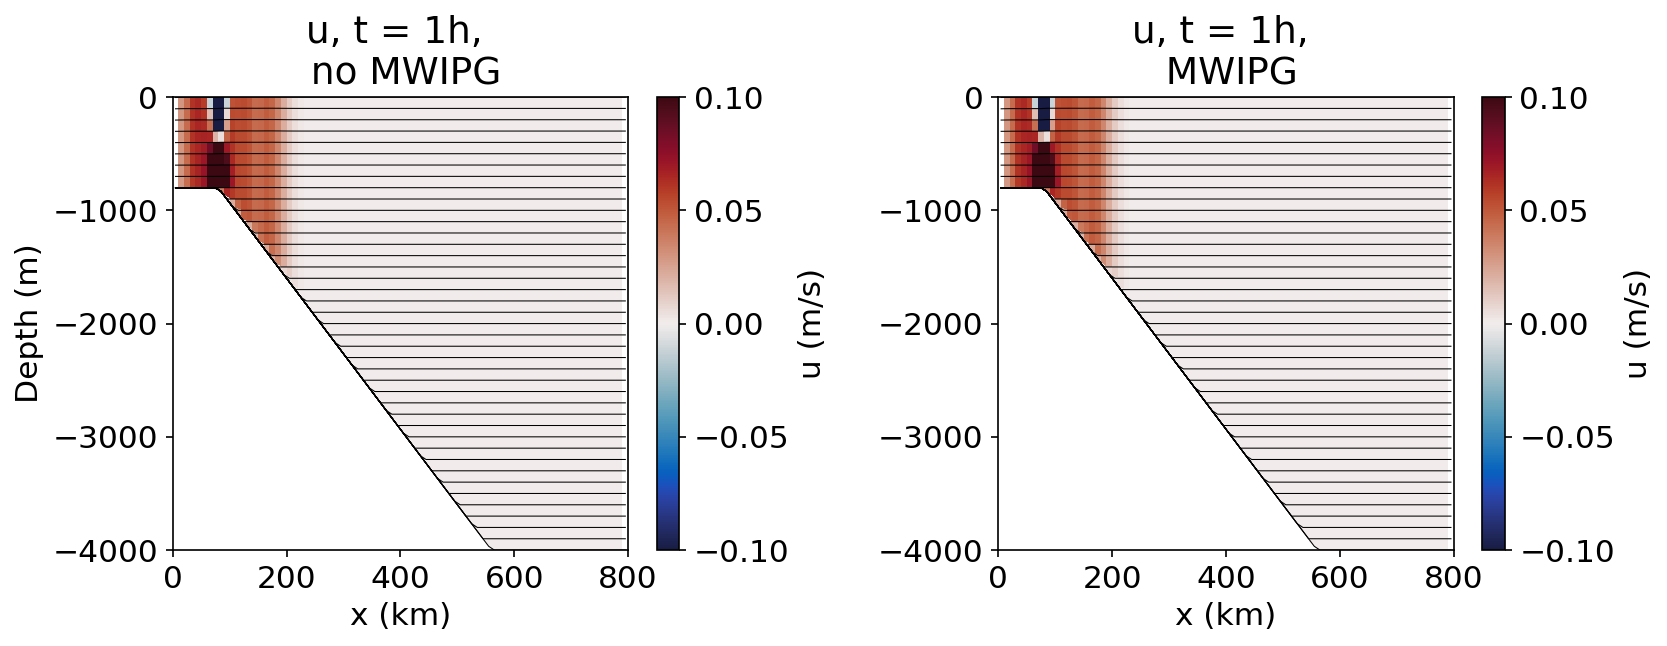

In [27]:
plt.rcParams.update({'font.size': 15})


label = 'nomwipg-mt1e-12'

fig, axes = plt.subplots(ncols = 2, figsize = (12,4),dpi = 150)
prog = open_files(label)
#IC = open_IC(label)
x = 0
time = 0#24*5-1
ymax = 4000
plot(axes[0],x,time,0,prog.u,"uo",-0.1,0.1,cm.cm.balance,ymax)

label = 'mwipg-mt1e-12'
prog = open_files(label)
plot(axes[1],x,time,0,prog.u,"uo",-0.1,0.1,cm.cm.balance,ymax)

axes[1].set_ylabel('')
axes[0].set_title('u, t = 1h, \n no MWIPG')
axes[1].set_title('u, t = 1h, \n MWIPG')
fig.subplots_adjust(wspace = 0.45)
plt.show()


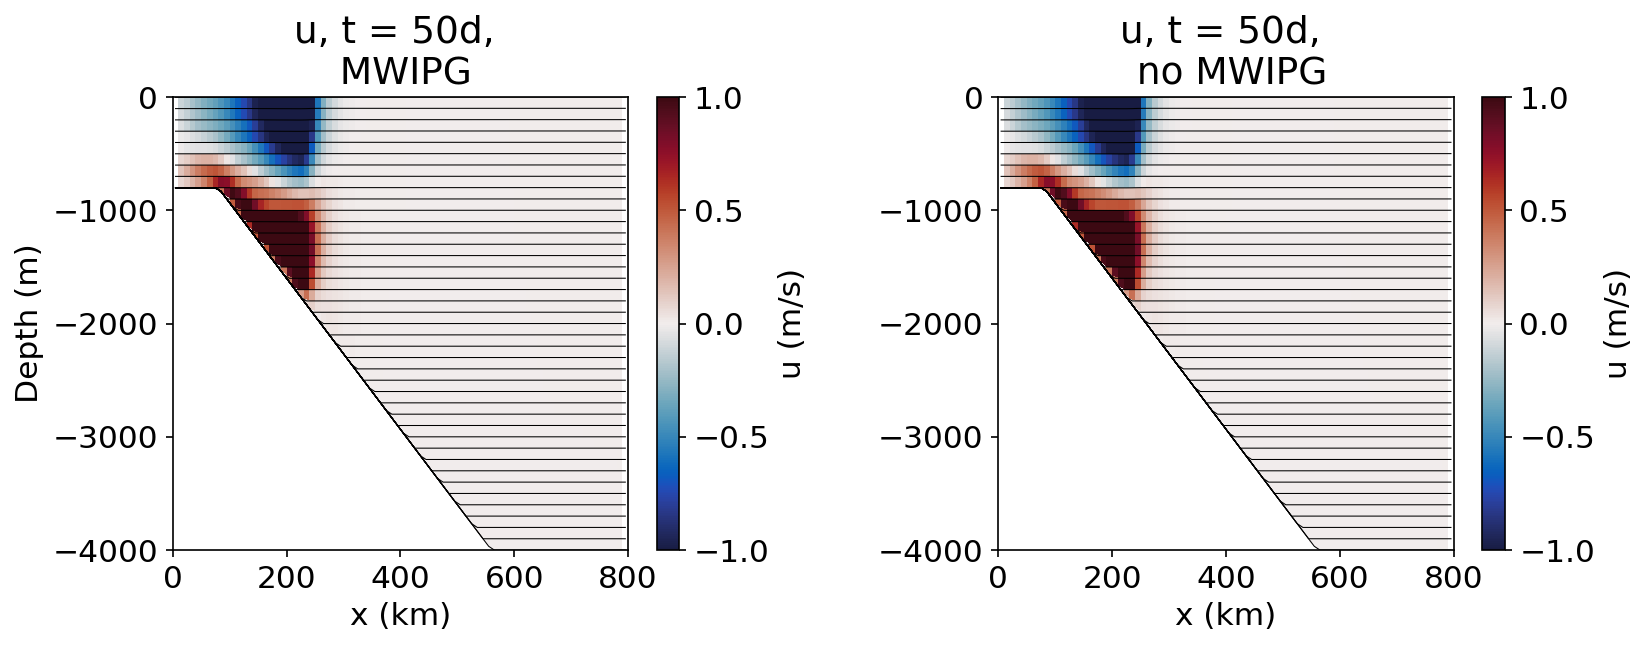

In [28]:
plt.rcParams.update({'font.size': 15})


label = 'nomwipg-mt1e-12'

fig, axes = plt.subplots(ncols = 2, figsize = (12,4),dpi = 150)
prog = open_files(label)
#IC = open_IC(label)
x = 0
time = -1#24*5-1
ymax = 4000
plot(axes[0],x,time,0,prog.u,"uo",-1,1,cm.cm.balance,ymax)

label = 'mwipg-mt1e-12'
prog = open_files(label)
plot(axes[1],x,time,0,prog.u,"uo",-1,1,cm.cm.balance,ymax)

axes[1].set_ylabel('')
axes[0].set_title('u, t = 50d, \n MWIPG')
axes[1].set_title('u, t = 50d, \n no MWIPG')
fig.subplots_adjust(wspace = 0.45)
plt.show()


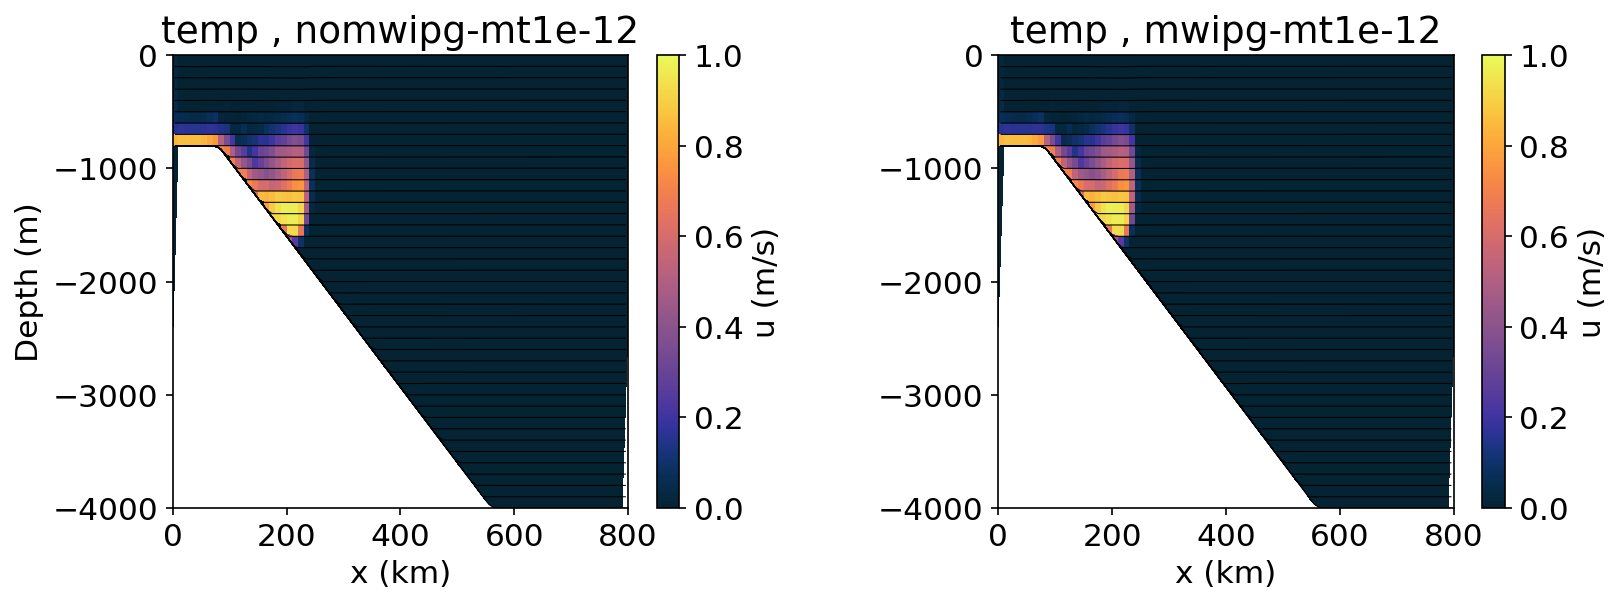

In [24]:
plt.rcParams.update({'font.size': 15})


label = 'nomwipg-mt1e-12'

fig, axes = plt.subplots(ncols = 2, figsize = (12,4),dpi = 150)
prog = open_files(label)
#IC = open_IC(label)
x = 0
time = -1#24*5-1
ymax = 4000
plot(axes[0],x,time,0,prog.temp,"temp",0,1,cm.cm.thermal,ymax)

label = 'mwipg-mt1e-12'
prog = open_files(label)
plot(axes[1],x,time,0,prog.temp,"temp",0,1,cm.cm.thermal,ymax)

axes[1].set_ylabel('')
#axes[0].set_title('u, t = 50d, \n reset')
#axes[1].set_title('u, t = 50d, \n reset+MWIPG')
fig.subplots_adjust(wspace = 0.45)
plt.show()


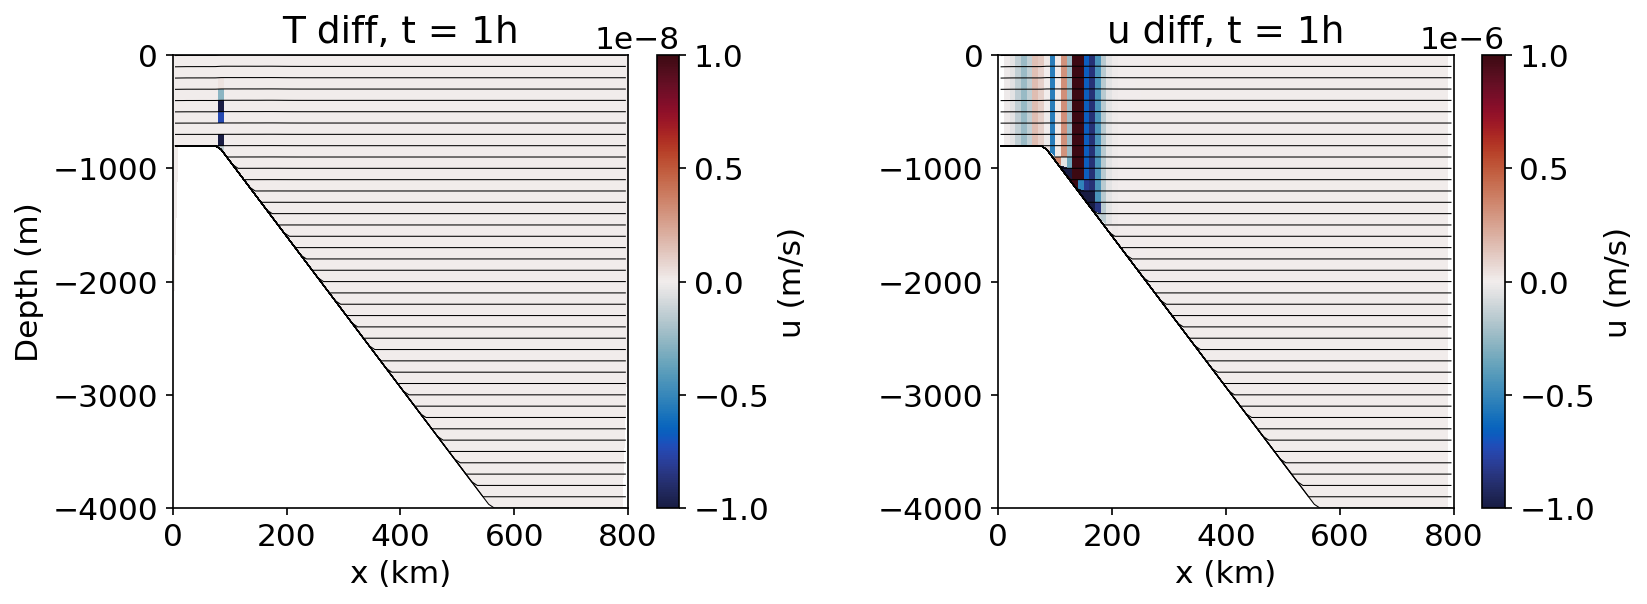

In [35]:
plt.rcParams.update({'font.size': 15})


label = 'nomwipg-mt1e-12'

fig, axes = plt.subplots(ncols = 2, figsize = (12,4),dpi = 150)
prog = open_files(label)
#IC = open_IC(label)
x = 0
time = 0#24*5-1
ymax = 4000
label = 'mwipg-mt1e-12'
prog2 = open_files(label)

plot(axes[0],x,time,0,prog.temp-prog2.temp,"temp",-0.00000001,0.00000001,cm.cm.balance,ymax)
plot(axes[1],x,time,0,prog.u-prog2.u,"uo",-0.000001,0.000001,cm.cm.balance,ymax)


axes[1].set_ylabel('')
axes[0].set_title('T diff, t = 1h')
axes[1].set_title('u diff, t = 1h')
fig.subplots_adjust(wspace = 0.45)
plt.show()


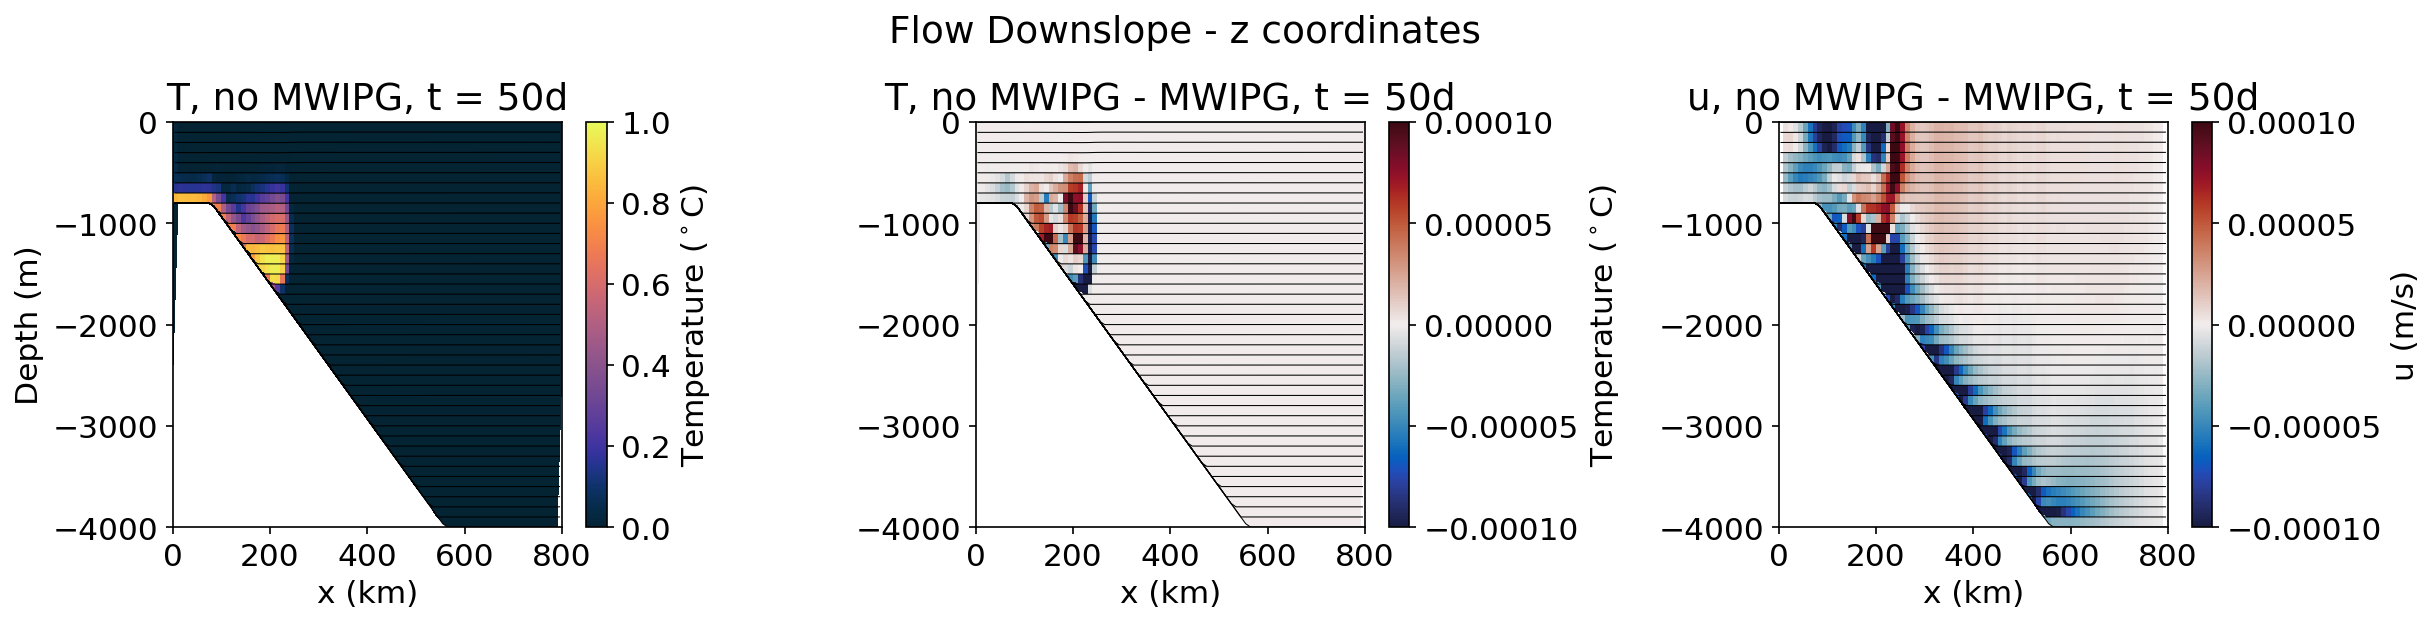

In [47]:
plt.rcParams.update({'font.size': 15})


label = 'nomwipg-mt1e-12'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4),dpi = 150)
prog = open_files(label)
#IC = open_IC(label)
x = 0
time = -1#24*5-1
ymax = 4000
label = 'mwipg-mt1e-12'
prog2 = open_files(label)

plot(axes[1],x,time,0,prog.temp-prog2.temp,"Temperature ($^\circ$C)",-0.0001,0.0001,cm.cm.balance,ymax)
plot(axes[2],x,time,0,prog.u-prog2.u,"uo",-0.0001,0.0001,cm.cm.balance,ymax)
plot(axes[0],x,time,0,prog.temp,"Temperature ($^\circ$C)",0,1,cm.cm.thermal,ymax)


axes[1].set_ylabel('')
axes[2].set_ylabel('')

axes[0].set_title('T, no MWIPG, t = 50d')
axes[1].set_title('T, no MWIPG - MWIPG, t = 50d')
axes[2].set_title('u, no MWIPG - MWIPG, t = 50d')
fig.subplots_adjust(wspace = 0.65, top = 0.8)
fig.suptitle('Flow Downslope - z coordinates')
plt.show()
